<a href="https://colab.research.google.com/github/Tofulati/LLNL_DataScience/blob/main/SqueezeNet_for_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/Shareddrives/LLNL_DataScience/data_3_4
!ls

/content/drive/Shareddrives/LLNL_DataScience/data_3_4
 bb29449106_1_1.md			   data_hearts_dd_0p2_geo_act_3_bcl
 cardiac_ml_tools.py			   data_hearts_dd_0p2_geo_act_3_bcl_gkr
'Copy of SqueezeNet_for_Task-3.ipynb"""'   data_hearts_dd_0p2_geo_act_3_bcl_gkr_I
'Copy of test_ecg_data (1).pt'		   data_hearts_dd_0p2_geo_inn
'Copy of test_ecg_data.pt'		   data_hearts_dd_0p2_geo_inn_act_1_bcl
'Copy of test_vm_activations (1).pt'	   data_hearts_dd_0p2_geo_inn_act_1_bcl_I
'Copy of test_vm_activations.pt'	   data_hearts_dd_0p2_geo_inn_act_2_bcl
'Copy of test_vm_data (1).pt'		   data_hearts_dd_0p2_geo_inn_act_2_bcl_I
'Copy of test_vm_data.pt'		   data_hearts_dd_0p2_geo_inn_act_3_bcl
'Copy of train_ecg_data (1).pt'		   data_hearts_dd_0p2_geo_inn_act_3_bcl_I
'Copy of train_ecg_data.pt'		   documentation
'Copy of train_vm_activations (1).pt'	   figures
'Copy of train_vm_activations.pt'	   license
'Copy of train_vm_data (1).pt'		   notebooks
'Copy of train_vm_data.pt'		   squeezenet_ecg_to_vm.pth
 data_

# Data analysis of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals

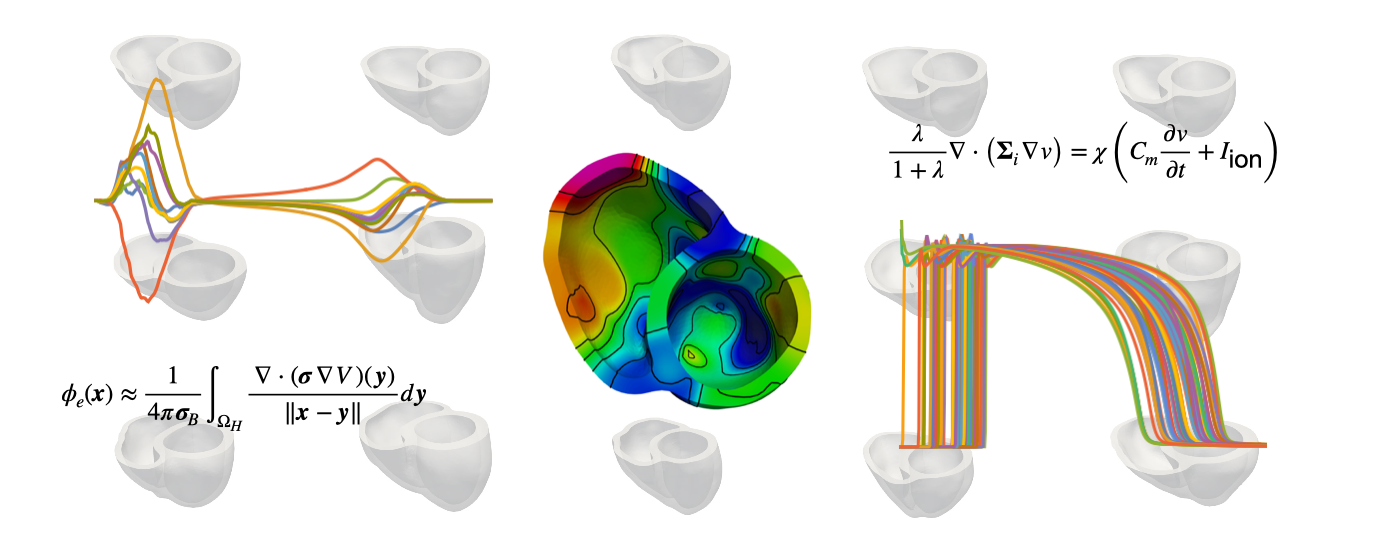

In [ ]:
# Import image module
from IPython.display import Image
# Get the image
Image(filename="figures/banner.png")

## Load Modules and Preprocessing Functions

Read the current directory:

In [ ]:
import os
print('The working directory is :{}'.format(os.getcwd()))

The working directory is :/content/drive/Shareddrives/LLNL_DataScience/data_3_4


Load libraries:

In [ ]:
import sys
print("Python is in %s" % sys.executable)
print("Python version is %s.%s.%s" % sys.version_info[:3])
import glob
import re, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

Python is in /usr/bin/python3
Python version is 3.10.12


## Loading Data

In [ ]:
train_ecg_data = torch.load("train_ecg_data.pt")
test_ecg_data = torch.load("test_ecg_data.pt")

train_vm_data = torch.load("train_vm_data.pt")
test_vm_data = torch.load("test_vm_data.pt")

train_vm_activations = torch.load("train_vm_activations.pt")
test_vm_activations = torch.load("test_vm_activations.pt")

print(train_ecg_data.size())
print(test_ecg_data.size())

print(train_vm_data.size())
print(test_vm_data.size())

print(train_vm_activations.size())
print(test_vm_activations.size())

torch.Size([500, 12, 14505])
torch.Size([500, 12, 1612])
torch.Size([500, 75, 14505])
torch.Size([500, 75, 1612])
torch.Size([14505, 75])
torch.Size([1612, 75])


## Plot one simulation

torch.Size([12, 500])


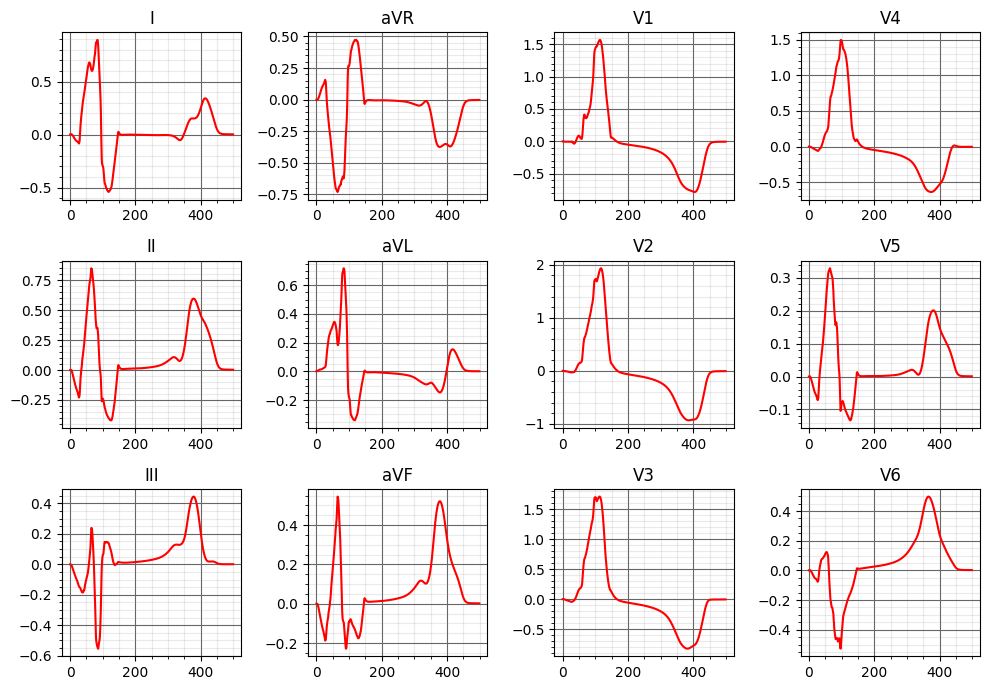

In [ ]:
row, column = 3, 4
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12}
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]

pECGData = train_ecg_data.permute(2, 1, 0)[10013]
print(pECGData.size())

for i in range(pECGData.shape[0]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[i,0:500],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    #plt.xlabel('msec')
    #plt.ylabel('mV')
plt.tight_layout()
plt.show()

torch.Size([75, 500])


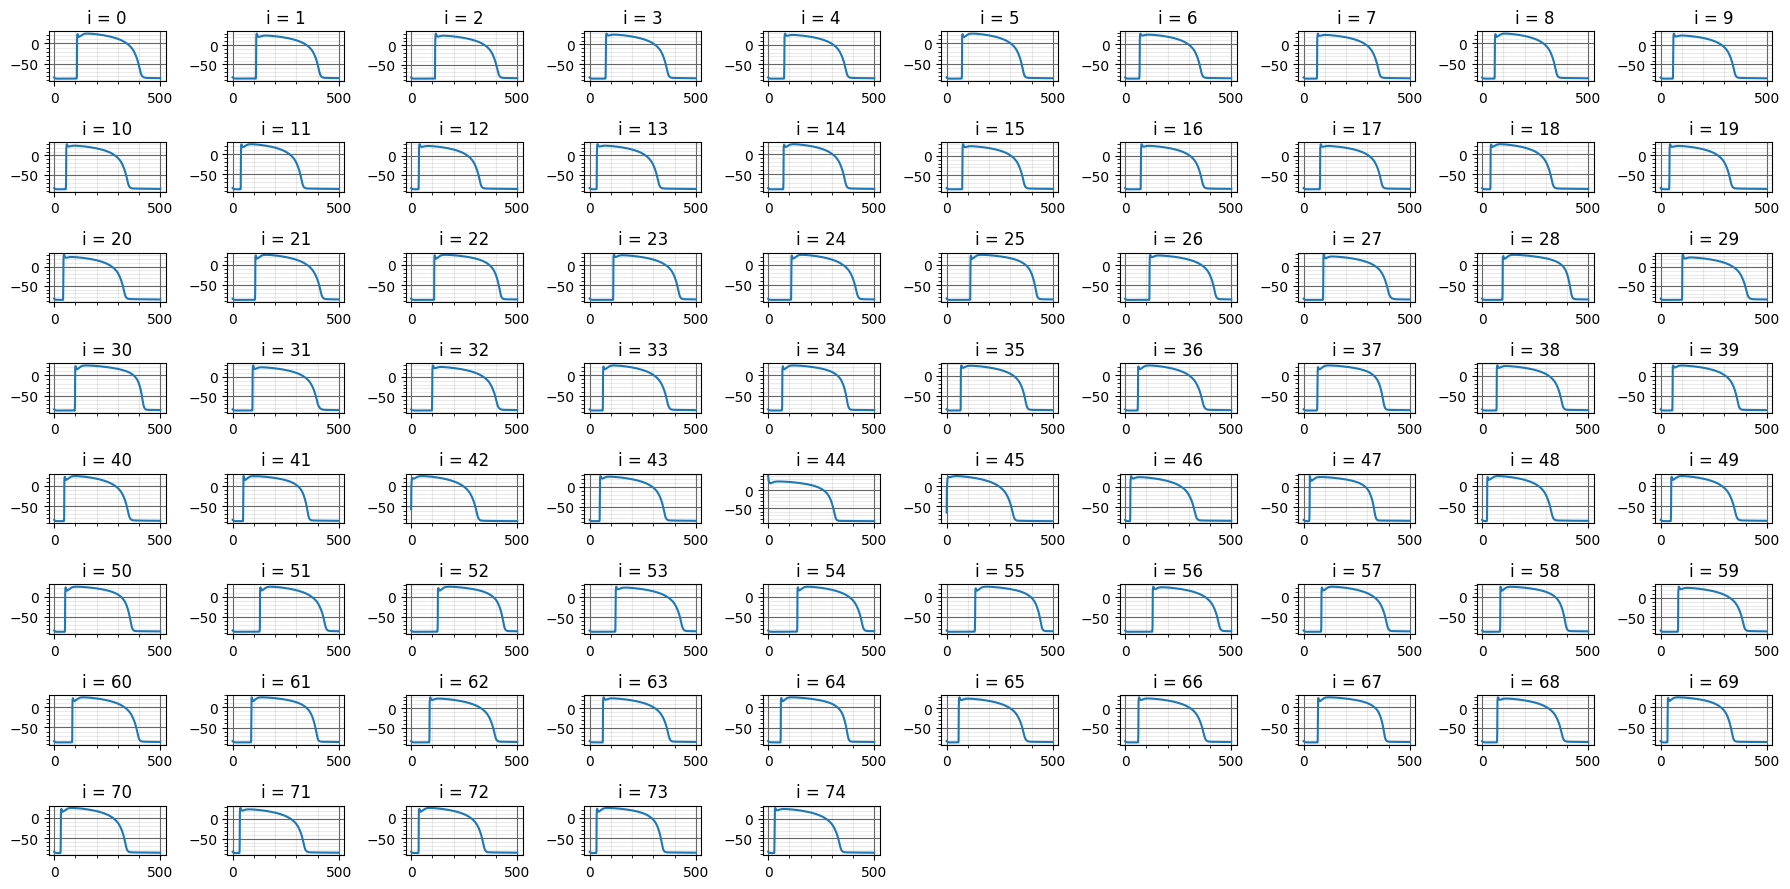

In [ ]:
num_timesteps = 500
plt.figure(figsize=(18, 9))
row, column = 7, 10

VmData = train_vm_data.permute(2, 1, 0)[10013]
print(VmData.shape)

randomIndex = range(VmData.shape[0])
for count, i in enumerate(randomIndex):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[i, 0:num_timesteps])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Convert data to numpy arrays for splitting
train_ecg_data_np = train_ecg_data.numpy()
train_vm_data_np = train_vm_data.numpy()
train_vm_activations_np = train_vm_activations.numpy()
# Create indices and split into train and test sets
num_samples = train_ecg_data_np.shape[2]
indices = np.arange(num_samples)
train_indices, valid_indices = train_test_split(indices, test_size=0.1, random_state=42)  # Adjust the test_size as needed
# Index into the data arrays to create train and test sets
train_ecg_data = train_ecg_data_np[:, :, train_indices]
valid_ecg_data = train_ecg_data_np[:, :, valid_indices]
train_vm_data = train_vm_data_np[:, :, train_indices]
valid_vm_data = train_vm_data_np[:, :, valid_indices]
train_vm_activations = train_vm_activations_np[train_indices, :]
valid_vm_activations = train_vm_activations_np[valid_indices, :]
# Convert back to torch tensors if needed
train_ecg_data = torch.Tensor(train_ecg_data)
valid_ecg_data = torch.Tensor(valid_ecg_data)
train_vm_data = torch.Tensor(train_vm_data)
valid_vm_data = torch.Tensor(valid_vm_data)
train_vm_activations = torch.Tensor(train_vm_activations)
valid_vm_activations = torch.Tensor(valid_vm_activations)
print("Training ECG data shape: ", train_ecg_data.size())
print("Validation ECG data shape: ", valid_ecg_data.size())
print("Training VM data shape: ", train_vm_data.size())
print("Validation VM data shape: ", valid_vm_data.size())
print("Training VM activations shape: ", train_vm_activations.size())
print("Validation VM activations shape: ", valid_vm_activations.size())

Training ECG data shape:  torch.Size([500, 12, 13054])
Validation ECG data shape:  torch.Size([500, 12, 1451])
Training VM data shape:  torch.Size([500, 75, 13054])
Validation VM data shape:  torch.Size([500, 75, 1451])
Training VM activations shape:  torch.Size([13054, 75])
Validation VM activations shape:  torch.Size([1451, 75])


## Designing SqueezeNet

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Fire(nn.Module):
    def __init__(self, in_channel, squeeze_channel, expand_channel):
        super(Fire, self).__init__()
        self.squeeze = nn.Conv1d(in_channel, squeeze_channel, kernel_size=1)
        self.squeeze_activation = nn.ReLU(inplace=True)
        self.expand1x1 = nn.Conv1d(squeeze_channel, expand_channel, kernel_size=1)
        self.expand3x3 = nn.Conv1d(squeeze_channel, expand_channel, kernel_size=3, padding=1)
        self.expand_activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.squeeze_activation(self.squeeze(x))
        return self.expand_activation(torch.cat([
            self.expand1x1(x),
            self.expand3x3(x)
        ], 1))

class SqueezeNetECGtoVM(nn.Module):
    def __init__(self):
        super(SqueezeNetECGtoVM, self).__init__()
        self.conv1 = nn.Conv1d(12, 64, kernel_size=5, stride=2, padding=2)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire2 = Fire(64, 16, 64)
        self.fire3 = Fire(128, 16, 64)

        self.maxpool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire4 = Fire(128, 32, 128)
        self.fire5 = Fire(256, 32, 128)

        self.maxpool3 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire6 = Fire(256, 48, 192)
        self.fire7 = Fire(384, 48, 192)
        self.fire8 = Fire(384, 64, 256)
        self.fire9 = Fire(512, 64, 256)

        self.dropout = nn.Dropout(p=0.1)

        self.conv2 = nn.Conv1d(512, 75, kernel_size=3, stride=2, padding=0)
        self.avgpool = nn.AdaptiveAvgPool1d(3)  # Ensures output shape matches input sequence length
        self.conv3 = nn.Conv1d(75, 75, kernel_size=3, stride=2, padding=0)

    def forward(self, x):
        #print("Shape start:", x.size())
        x = self.relu(self.conv1(x))
        #print("Shape after conv1:", x.size())

        x = self.maxpool1(x)
        #print("Shape after maxpool1:", x.size())

        x = self.fire2(x)
        #print("Shape after fire2:", x.size())
        x = self.fire3(x)
        #print("Shape after fire3:", x.size())

        x = self.maxpool2(x)
        #print("Shape after maxpool2:", x.size())

        x = self.fire4(x)
        #print("Shape after fire4:", x.size())
        x = self.fire5(x)
        #print("Shape after fire5:", x.size())

        x = self.maxpool3(x)
        #print("Shape after maxpool3:", x.size())

        x = self.fire6(x)
        #print("Shape after fire6:", x.size())
        x = self.fire7(x)
        #print("Shape after fire7:", x.size())
        x = self.fire8(x)
        #print("Shape after fire8:", x.size())
        x = self.fire9(x)
        #print("Shape after fire9:", x.size())

        x = self.dropout(x)
        #print("Shape after dropout:", x.size())
        x = self.conv2(x)
        #print("Shape after conv2:", x.size())

        x = self.avgpool(x)
        #print("Shape after avgpool:", x.size())
        x = self.conv3(x)
        #print("Shape after conv3:", x.size())

        return x

# Example usage
model = SqueezeNetECGtoVM()
all_ecg_data = torch.randn(500, 12, 64)  # Example input tensor with batch size 50
output = model(all_ecg_data.permute(2, 1, 0))  # Permuting to (N, 12, 500) to match Conv1d input shape
print(output.shape)  # Should output (50, 75, 500) which will be permuted back to (500, 75, N)

torch.Size([64, 75, 1])


In [ ]:
# Transpose training data tensors to match sizes
train_ecg_data = train_ecg_data.permute(2, 1, 0)  # (N, 75, 500)
valid_ecg_data = valid_ecg_data.permute(2, 1, 0)  # (N, 12, 500)
print(train_ecg_data.size())
print(valid_ecg_data.size())

torch.Size([13054, 12, 500])
torch.Size([1451, 12, 500])


In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the SqueezeNetECGtoVM model (using the previously provided class definition)
# Assuming SqueezeNetECGtoVM is already defined

# Example data generation for demonstration
# Replace these with your actual data loading
N = 100  # Number of samples
# all_ecg_data = torch.randn(500, 12, N)  # Example input tensor
# vm_data = torch.randn(500, 75, N)  # Example target tensor

# Create Dataset and DataLoader
training_set = TensorDataset(train_ecg_data, train_vm_activations)
train_loader = DataLoader(training_set, batch_size=64, shuffle=True)

valid_set = TensorDataset(valid_ecg_data, valid_vm_activations)
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=True)

print(len(valid_loader))

# Initialize the model, loss function, and optimizer
# model = SqueezeNetECGtoVM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with learning curve
num_epochs = 100
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs).squeeze(dim=2)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss_prev = running_loss + 0
        running_loss += loss.item()

        if i % 20 == 19:  # Print every 20 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {(running_loss - running_loss_prev) / 1:.4f}')

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation of model after each epoch
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            outputs = model(inputs).squeeze(dim=2)
            loss = criterion(outputs, targets)
            valid_loss += loss.item()

    valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(valid_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {valid_loss:.4f}')

print('Training finished.')

# Example: Saving the model
torch.save(model.state_dict(), 'squeezenet_ecg_to_vm.pth')

# Example: Loading the model
model.load_state_dict(torch.load('squeezenet_ecg_to_vm.pth'))

23
Epoch [1/150], Batch [20], Loss: 88.6970
Epoch [1/150], Batch [40], Loss: 71.7451
Epoch [1/150], Batch [60], Loss: 75.1372
Epoch [1/150], Batch [80], Loss: 58.6697
Epoch [1/150], Batch [100], Loss: 62.6553
Epoch [1/150], Batch [120], Loss: 65.3446
Epoch [1/150], Batch [140], Loss: 56.9971
Epoch [1/150], Batch [160], Loss: 62.1044
Epoch [1/150], Batch [180], Loss: 64.6829
Epoch [1/150], Batch [200], Loss: 63.4740
Epoch [1/150], Train Loss: 72.4545, Val Loss: 72.3686
Epoch [2/150], Batch [20], Loss: 69.5620
Epoch [2/150], Batch [40], Loss: 76.2566
Epoch [2/150], Batch [60], Loss: 54.0032
Epoch [2/150], Batch [80], Loss: 61.5288
Epoch [2/150], Batch [100], Loss: 70.1567
Epoch [2/150], Batch [120], Loss: 66.1141
Epoch [2/150], Batch [140], Loss: 73.6118
Epoch [2/150], Batch [160], Loss: 63.3983
Epoch [2/150], Batch [180], Loss: 64.8519
Epoch [2/150], Batch [200], Loss: 61.2707
Epoch [2/150], Train Loss: 64.8305, Val Loss: 69.0677
Epoch [3/150], Batch [20], Loss: 68.6553
Epoch [3/150], B

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the SqueezeNetECGtoVM model (using the previously provided class definition)
# Assuming SqueezeNetECGtoVM is already defined

# Example data generation for demonstration
# Replace these with your actual data loading
# N = 100  # Number of samples
# all_ecg_data = torch.randn(500, 12, N)  # Example input tensor
# vm_data = torch.randn(500, 75, N)  # Example target tensor

train_error_list = []
val_error_list = []

# Create Dataset and DataLoader
training_set = TensorDataset(train_ecg_data, train_vm_activations)
train_loader = DataLoader(training_set, batch_size=64, shuffle=True)

valid_set = TensorDataset(valid_ecg_data, valid_vm_activations)
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=True)

print(len(valid_loader))

# Initialize the model, loss function, and optimizer
# model = SqueezeNetECGtoVM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with learning curve
num_epochs = 200
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs).squeeze(dim=2)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss_prev = running_loss + 0
        running_loss += loss.item()

        if i % 20 == 19:  # Print every 20 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {(running_loss - running_loss_prev) / 1:.4f}')

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation of model after each epoch
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            outputs = model(inputs).squeeze(dim=2)
            loss = criterion(outputs, targets)
            valid_loss += loss.item()

    valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(valid_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {valid_loss:.4f}')

print('Training finished.')

# Example: Saving the model
torch.save(model.state_dict(), 'squeezenet_ecg_to_vm_200.pth')

# Example: Loading the model
model.load_state_dict(torch.load('squeezenet_ecg_to_vm_200.pth'))

23
Epoch [1/200], Batch [20], Loss: 414.1220
Epoch [1/200], Batch [40], Loss: 365.9961
Epoch [1/200], Batch [60], Loss: 392.6882
Epoch [1/200], Batch [80], Loss: 376.6516
Epoch [1/200], Batch [100], Loss: 361.1404
Epoch [1/200], Batch [120], Loss: 357.2201
Epoch [1/200], Batch [140], Loss: 354.7137
Epoch [1/200], Batch [160], Loss: 332.6035
Epoch [1/200], Batch [180], Loss: 355.2016
Epoch [1/200], Batch [200], Loss: 352.6274
Epoch [1/200], Train Loss: 390.0077, Val Loss: 344.6594
Epoch [2/200], Batch [20], Loss: 360.5641
Epoch [2/200], Batch [40], Loss: 328.8102
Epoch [2/200], Batch [60], Loss: 318.7583
Epoch [2/200], Batch [80], Loss: 360.9135
Epoch [2/200], Batch [100], Loss: 391.2147
Epoch [2/200], Batch [120], Loss: 306.4877
Epoch [2/200], Batch [140], Loss: 327.3456
Epoch [2/200], Batch [160], Loss: 322.5887
Epoch [2/200], Batch [180], Loss: 340.5405
Epoch [2/200], Batch [200], Loss: 326.0304
Epoch [2/200], Train Loss: 341.4144, Val Loss: 349.6767
Epoch [3/200], Batch [20], Loss: 

<All keys matched successfully>

In [ ]:
train_ecg_data = torch.load("train_ecg_data.pt")
test_ecg_data = torch.load("test_ecg_data.pt")

train_vm_data = torch.load("train_vm_data.pt")
test_vm_data = torch.load("test_vm_data.pt")

train_vm_activations = torch.load("train_vm_activations.pt")
test_vm_activations = torch.load("test_vm_activations.pt")

print(train_ecg_data.size())
print(test_ecg_data.size())

print(train_vm_data.size())
print(test_vm_data.size())

print(train_vm_activations.size())
print(test_vm_activations.size())

torch.Size([500, 12, 14505])
torch.Size([500, 12, 1612])
torch.Size([500, 75, 14505])
torch.Size([500, 75, 1612])
torch.Size([14505, 75])
torch.Size([1612, 75])


In [ ]:
from sklearn.model_selection import train_test_split
# Convert data to numpy arrays for splitting
train_ecg_data_np = train_ecg_data.numpy()
train_vm_data_np = train_vm_data.numpy()
train_vm_activations_np = train_vm_activations.numpy()
# Create indices and split into train and test sets
num_samples = train_ecg_data_np.shape[2]
indices = np.arange(num_samples)
train_indices, valid_indices = train_test_split(indices, test_size=0.1, random_state=42)  # Adjust the test_size as needed
# Index into the data arrays to create train and test sets
train_ecg_data = train_ecg_data_np[:, :, train_indices]
valid_ecg_data = train_ecg_data_np[:, :, valid_indices]
train_vm_data = train_vm_data_np[:, :, train_indices]
valid_vm_data = train_vm_data_np[:, :, valid_indices]
train_vm_activations = train_vm_activations_np[train_indices, :]
valid_vm_activations = train_vm_activations_np[valid_indices, :]
# Convert back to torch tensors if needed
train_ecg_data = torch.Tensor(train_ecg_data)
valid_ecg_data = torch.Tensor(valid_ecg_data)
train_vm_data = torch.Tensor(train_vm_data)
valid_vm_data = torch.Tensor(valid_vm_data)
train_vm_activations = torch.Tensor(train_vm_activations)
valid_vm_activations = torch.Tensor(valid_vm_activations)
print("Training ECG data shape: ", train_ecg_data.size())
print("Validation ECG data shape: ", valid_ecg_data.size())
print("Training VM data shape: ", train_vm_data.size())
print("Validation VM data shape: ", valid_vm_data.size())
print("Training VM activations shape: ", train_vm_activations.size())
print("Validation VM activations shape: ", valid_vm_activations.size())

Training ECG data shape:  torch.Size([500, 12, 13054])
Validation ECG data shape:  torch.Size([500, 12, 1451])
Training VM data shape:  torch.Size([500, 75, 13054])
Validation VM data shape:  torch.Size([500, 75, 1451])
Training VM activations shape:  torch.Size([13054, 75])
Validation VM activations shape:  torch.Size([1451, 75])


In [ ]:
# Transpose training data tensors to match sizes
train_ecg_data = train_ecg_data.permute(2, 1, 0)  # (N, 75, 500)
valid_ecg_data = valid_ecg_data.permute(2, 1, 0)  # (N, 12, 500)

print(train_ecg_data.size())
print(valid_ecg_data.size())

torch.Size([13054, 12, 500])
torch.Size([1451, 12, 500])


In [ ]:
test_ecg_data = test_ecg_data.permute(2, 1, 0)  # (N, 12, 500)
print(test_ecg_data.size())
print(test_vm_activations.size())

torch.Size([1612, 12, 500])
torch.Size([1612, 75])


In [ ]:
test_set = TensorDataset(test_ecg_data, test_vm_activations)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

In [ ]:
count = 0
for inputs, targets in test_loader:
    outputs = model(inputs).squeeze(dim=2)
    if count == 0:
        a_true1 = targets[3]
        a_pred1 = outputs[3]

        a_true2 = targets[13]
        a_pred2 = outputs[13]

        a_true3 = targets[23]
        a_pred3 = outputs[23]

        a_true4 = targets[53]
        a_pred4 = outputs[53]

    count += 1

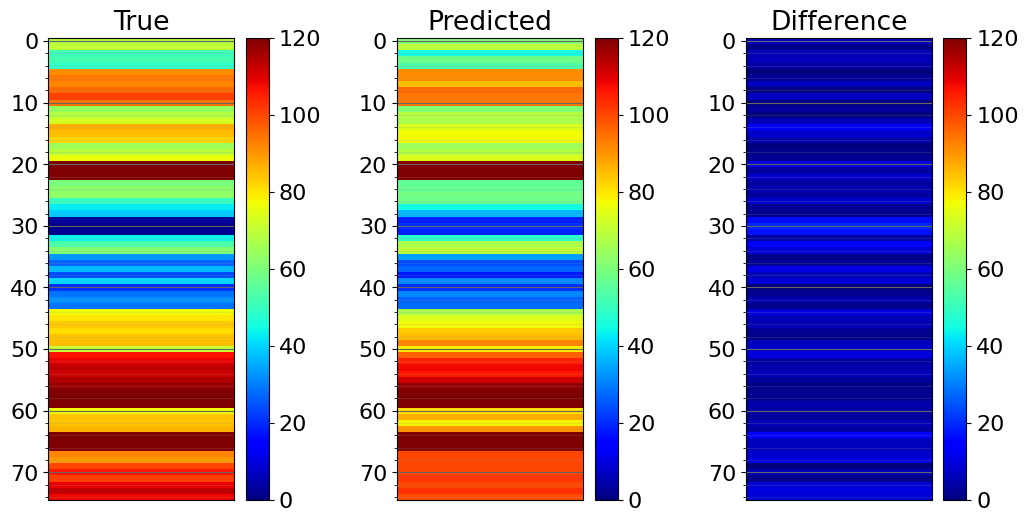

In [ ]:
a_true1 = a_true1.unsqueeze(1)
a_true2 = a_true2.unsqueeze(1)
a_true3 = a_true3.unsqueeze(1)
a_true4 = a_true4.unsqueeze(1)
a_pred1 = torch.round(a_pred1.unsqueeze(1), decimals=0)
a_pred2 = torch.round(a_pred2.unsqueeze(1), decimals=0)
a_pred3 = torch.round(a_pred3.unsqueeze(1), decimals=0)
a_pred4 = torch.round(a_pred4.unsqueeze(1), decimals=0)
a_diff1 = torch.abs(a_true1 - a_pred1)
a_diff2 = torch.abs(a_true2 - a_pred2)
a_diff3 = torch.abs(a_true3 - a_pred3)
a_diff4 = torch.abs(a_true4 - a_pred4)

a_pred1 = a_pred1.detach().numpy()
a_pred2 = a_pred2.detach().numpy()
a_pred3 = a_pred3.detach().numpy()
a_pred4 = a_pred4.detach().numpy()

a_diff1 = a_diff1.detach().numpy()
a_diff2 = a_diff2.detach().numpy()
a_diff3 = a_diff3.detach().numpy()
a_diff4 = a_diff4.detach().numpy()

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

# Plot the first activation time array
plt.subplot(1, 3, 1)
plt.imshow(a_true3, cmap='jet', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
plt.title('True')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the second activation time array
plt.subplot(1, 3, 2)
plt.imshow(a_pred3, cmap='jet', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
plt.title('Predicted')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the absolute difference
plt.subplot(1, 3, 3)
plt.imshow(a_diff3, cmap='jet', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
plt.title('Difference')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)  # Increase horizontal space

# Show the plot
plt.show()

In [ ]:
model.load_state_dict(torch.load('squeezenet_ecg_to_vm.pth'))

In [ ]:
import numpy as np

# Initialize an empty list to collect outputs
output_list = []

for inputs, targets in valid_loader:
    # Get model outputs and remove the dimension of size 1
    outputs = model(inputs).squeeze(dim=2)

    # Convert tensor to NumPy array and append to the list
    output_list.append(outputs.detach().numpy())

    if len(output_list) == 1:
        print(targets)
        print(len(targets))

# Convert the list of arrays into a single NumPy array
output_array = np.concatenate(output_list, axis=0)

print(len(output_array))


tensor([[ 31.,  28.,  22.,  ...,  33.,  30.,  25.],
        [ 41.,  45.,  84.,  ..., 103., 108., 113.],
        [ 34.,  27.,  18.,  ...,  13.,   8.,   2.],
        ...,
        [ 49.,  51.,  49.,  ...,  75.,  79.,  84.],
        [ 96.,  92.,  85.,  ...,  32.,  26.,  22.],
        [ 41.,  45.,  41.,  ...,  25.,  28.,  31.]])
64
1451


In [ ]:
len(valid_loader)

23

In [ ]:
output_array.shape

(1451, 75)

(75,)


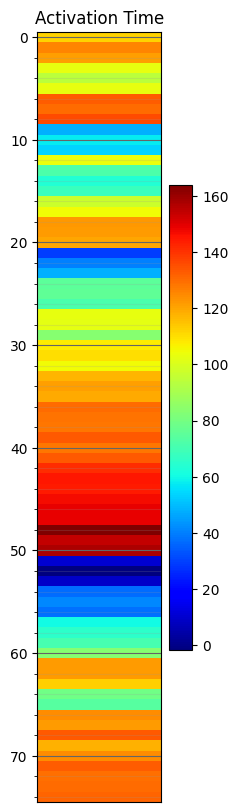

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming output_array has the shape (1451, 75)
ActTime = output_array[10]

# Print the shape to confirm
print(ActTime.shape)

# Reshape ActTime to (75, 1)
ActTime_reshaped = ActTime.reshape((75, 1))

# Plot the Activation Time array
plt.figure(figsize=(2, 10))  # Adjust figure size as needed
plt.imshow(ActTime_reshaped, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])  # Optionally remove x-ticks if needed
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


In [ ]:
# Example of file pair
plt.figure(figsize=(1, 10))

ActTime = valid_set[10]

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

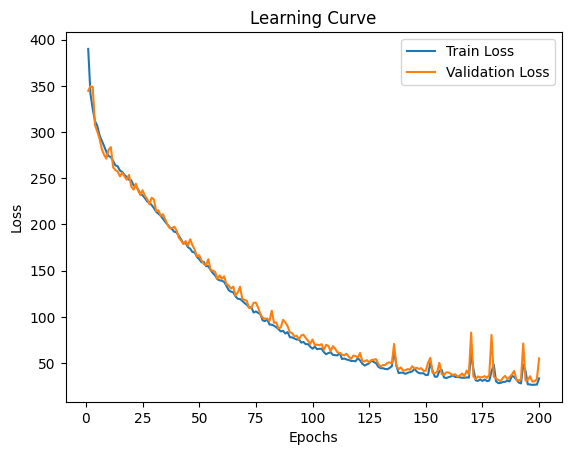

In [ ]:
# Plotting the learning curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()